In [54]:
from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# read and display eeg data csv file
train_data = pd.read_csv('../Python/Dataset/S01')
train_data.head()

,C1,C2,C3,C4,C5,C6,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,4.150454,0.192264,0.225834,-20.263981,18.738079,-5.889982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.446479,1.913481,4.299992,-6.561379,41.260395,12.726024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.200351,3.363088,2.221714,-13.031205,53.864347,20.080873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.186160,1.181048,-0.872816,-37.079423,28.839551,6.775006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.909361,3.921569,5.008011,-3.692683,67.566949,45.563439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
# data preprocessing and downsampling and plot

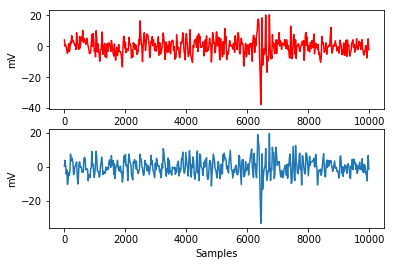

In [58]:
dataC5 = train_data['C1'][0:10000]
plt.subplot(211)
plt.plot(dataC5[::20],'r')
plt.xlabel('Samples')
plt.ylabel('mV')
dataC6 = train_data['C3'][0:10000]
plt.subplot(212)
plt.plot(dataC6[::20])
plt.xlabel('Samples')
plt.ylabel('mV')

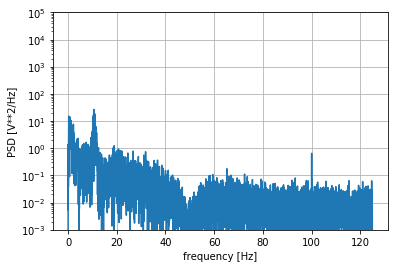

In [60]:
from scipy import signal
f, Pxx_den = signal.periodogram(dataC6, fs=250)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-3, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()

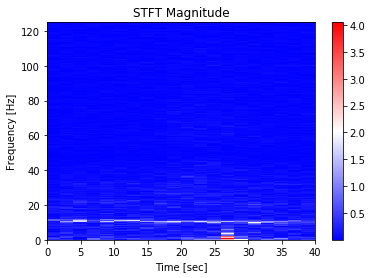

In [62]:
from scipy import signal
f, t, Zxx = signal.stft(dataC6, 250, nperseg=1000)
plt.pcolor(t, f, np.abs(Zxx), cmap='bwr')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

In [230]:
# feature extraction dataC3

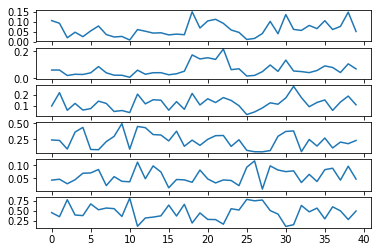

In [63]:
# feature extraction method
en, Num, e1, e2, e3, e4, e5, e6 = 0, 250, [], [], [], [], [], []
for st in range(0, 10000, Num):
    en = en + Num
    #Time domain feature extraction
    x1 = dataC5[st:en]
    from pywt import wavedec
    coeffs = wavedec(np.asarray(x1), 'db4', level=5)
    [cA5, cD5, cD4, cD3 ,cD2, cD1] = coeffs
    #cD1
    eD1 = sum(x*x for x in cD1)
    eD2 = sum(x*x for x in cD2)
    eD3 = sum(x*x for x in cD3)
    eD4 = sum(x*x for x in cD4)
    eD5 = sum(x*x for x in cD5)
    eA5 = sum(x*x for x in cA5)
    #print "eD1=",eD1, "\neD2=",eD2,"\neD3=",eD3, "\neD4=",eD4, "\neD5=",eD5, "\neA5=",eA5
    
    eT = eD1+eD2+eD3+eD4+eD5+eA5
    #print "\neT=",eT,"\n"
    eR1 = eD1/eT
    e1.append(eR1)
    eR2 = eD2/eT
    e2.append(eR2)
    eR3 = eD3/eT
    e3.append(eR3)
    eR4 = eD4/eT
    e4.append(eR4)
    eR5 = eD5/eT
    e5.append(eR5)
    eRA5 = eA5/eT
    e6.append(eRA5)
    #print "eR1=",eR1, "\neR2=",eR2,"\neR3=",eR3,"\neR4=",eR4, "\neR5=",eR5, "\neRA5=",eRA5,"\n"

plt.subplot(611)
plt.plot(e1)
plt.subplot(612)
plt.plot(e2)
plt.subplot(613)
plt.plot(e3)
plt.subplot(614)
plt.plot(e4)
plt.subplot(615)
plt.plot(e5)
plt.subplot(616)
plt.plot(e6)

In [64]:
# feature extraction dataC4

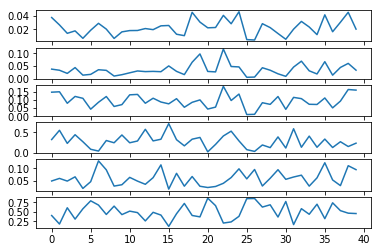

In [65]:
en, Num, f1, f2, f3, f4, f5, f6 = 0, 250, [], [], [], [], [], []
for st in range(0, 10000, Num):
    en = en + Num
    #Time domain feature extraction
    x1 = dataC6[st:en]
    from pywt import wavedec
    coeffs = wavedec(np.asarray(x1), 'db4', level=5)
    [cA5, cD5, cD4, cD3 ,cD2, cD1] = coeffs
    #cD1
    eD1 = sum(x*x for x in cD1)
    eD2 = sum(x*x for x in cD2)
    eD3 = sum(x*x for x in cD3)
    eD4 = sum(x*x for x in cD4)
    eD5 = sum(x*x for x in cD5)
    eA5 = sum(x*x for x in cA5)
    #print "eD1=",eD1, "\neD2=",eD2,"\neD3=",eD3, "\neD4=",eD4, "\neD5=",eD5, "\neA5=",eA5
    
    eT = eD1+eD2+eD3+eD4+eD5+eA5
    #print "\neT=",eT,"\n"
    eR1 = eD1/eT
    f1.append(eR1)
    eR2 = eD2/eT
    f2.append(eR2)
    eR3 = eD3/eT
    f3.append(eR3)
    eR4 = eD4/eT
    f4.append(eR4)
    eR5 = eD5/eT
    f5.append(eR5)
    eRA5 = eA5/eT
    f6.append(eRA5)
    #print "eR1=",eR1, "\neR2=",eR2,"\neR3=",eR3,"\neR4=",eR4, "\neR5=",eR5, "\neRA5=",eRA5,"\n"
    
plt.subplot(611)
plt.plot(f1)
plt.subplot(612)
plt.plot(f2)
plt.subplot(613)
plt.plot(f3)
plt.subplot(614)
plt.plot(f4)
plt.subplot(615)
plt.plot(f5)
plt.subplot(616)
plt.plot(f6)


In [355]:
# normalize dataC3

In [66]:
e11, e22, e33, e44, e55, e66 = [], [], [], [], [], []
m = np.mean(e1)
v = np.std(e1)
for i in e1:
    it1 = (i-m)/v
    e11.append(it1)
m = np.mean(e2)
v = np.std(e2)
for i in e2:
    it2 = (i-m)/v
    e22.append(it2)
m = np.mean(e3)
v = np.std(e3)
for i in e3:
    it3 = (i-m)/v
    e33.append(it3)
m = np.mean(e4)
v = np.std(e4)
for i in e4:
    it4 = (i-m)/v
    e44.append(it4)
m = np.mean(e5)
v = np.std(e5)
for i in e5:
    it5 = (i-m)/v
    e55.append(it5)
m = np.mean(e6)
v = np.std(e6)
for i in e6:
    it6 = (i-m)/v
    e66.append(it6)

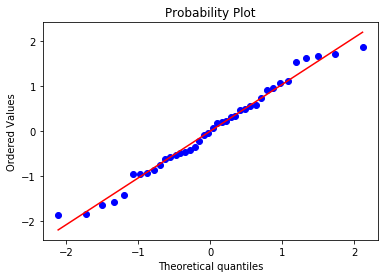

In [67]:
# normalization plots
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(e66, plot=plt)

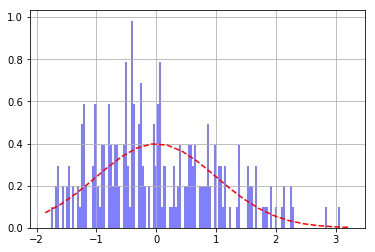

In [68]:
# histogram plots
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
mu = 0 # mean of distribution
sigma = 1 # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist([e11, e22, e33, e44, e55, e66], num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.grid()
plt.show()

In [69]:
# normalize dataC4

In [70]:
f11, f22, f33, f44, f55, f66 = [], [], [], [], [], []
m = np.mean(f1)
v = np.std(f1)
for i in f1:
    it1 = (i-m)/v
    f11.append(it1)
m = np.mean(f2)
v = np.std(f2)
for i in f2:
    it2 = (i-m)/v
    f22.append(it2)
m = np.mean(f3)
v = np.std(f3)
for i in f3:
    it3 = (i-m)/v
    f33.append(it3)
m = np.mean(f4)
v = np.std(f4)
for i in f4:
    it4 = (i-m)/v
    f44.append(it4)
m = np.mean(f5)
v = np.std(f5)
for i in f5:
    it5 = (i-m)/v
    f55.append(it5)
m = np.mean(f6)
v = np.std(f6)
for i in f6:
    it6 = (i-m)/v
    f66.append(it6)

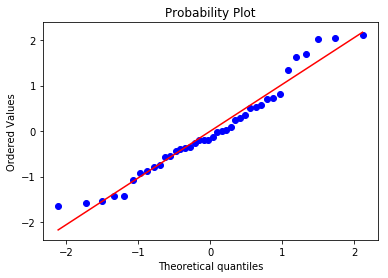

In [71]:
# normalization plots
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(f11, plot=plt)

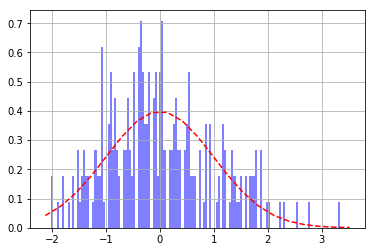

In [72]:
# histogram plots
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
mu = 0 # mean of distribution
sigma = 1 # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist([f11, f22, f33, f44, f55, f66], num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.grid()
plt.show()

In [73]:
e_d = np.transpose([e11, e22, e33, e44, e55, e66])
tar = np.ones((40,1))

In [74]:
f_d = np.transpose([f11, f22, f33, f44, f55, f66])
tar1 = np.zeros((40,1))

In [75]:
final=np.concatenate((e_d, f_d), axis=0)
target=np.concatenate((tar, tar1), axis=0)
import pandas as pd 
df = pd.DataFrame(final)
df.to_csv("dat", index=False)

In [76]:
data = pd.read_csv("../Python/dat")
data

,0,1,2,3,4,5
0,1.194085,-0.097851,-0.409747,0.053178,-0.556296,-0.042272
1,0.826383,-0.100555,1.754581,-0.007479,-0.427561,-0.577851
2,-1.201415,-0.969206,-1.108024,-1.117991,-1.067587,1.664402
3,-0.426432,-0.771796,0.008596,1.077342,-0.497135,-0.353155
4,-1.046457,-0.804410,-1.071111,1.679923,0.415783,-0.430410
5,-0.244327,-0.541505,-0.832143,-1.172457,0.457341,1.112540
6,0.443160,0.452083,0.377505,-1.206167,0.938759,0.337051
7,-0.753806,-0.545809,0.005616,-0.157303,-1.324597,0.568125
8,-1.090237,-0.914587,-1.303686,0.521502,-0.061243,0.486872
9,-1.014620,-0.929704,-1.145857,2.171348,-0.721951,-0.538747


In [77]:
# Dataset preparation for classification

In [78]:
from sklearn.model_selection import train_test_split

X = np.asarray(data[['0', '1', '2', '3', '4', '5']])
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
#Classifiers

In [81]:
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [82]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

In [83]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  4]
 [ 4  5]]


In [84]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 66.666667
Sensitivity :73.333333
Specificity :55.555556
Precision :68.750000


In [85]:
# 2. KNN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [86]:
from sklearn.metrics import classification_report, confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)  
#print(classification_report(y_test, y_pred))  

[[ 3 12]
 [ 4  5]]


In [87]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 33.333333
Sensitivity :20.000000
Specificity :55.555556
Precision :37.500000


In [88]:
# 3. Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.71
Accuracy of SVM classifier on test set: 0.33


In [89]:
# Predicting the Test set results
y_pred = svm.predict(X_test)
y_pred = (y_pred > 0.5)

In [90]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3 12]
 [ 4  5]]


In [91]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 33.333333
Sensitivity :20.000000
Specificity :55.555556
Precision :37.500000


In [92]:
# MLP Classifier

In [93]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=6, units=20)`
  
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [94]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 1, nb_epoch = 200)

Epoch 1/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6944 - acc: 0.4464
Epoch 2/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6934 - acc: 0.5000
Epoch 3/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6924 - acc: 0.5357
Epoch 4/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6919 - acc: 0.5536
Epoch 5/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6909 - acc: 0.5536
Epoch 6/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6903 - acc: 0.5536
Epoch 7/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6889 - acc: 0.5536
Epoch 8/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6876 - acc: 0.5536
Epoch 9/200
56/56 [==============================] - 0s 1ms/step - loss: 0.6854 - acc: 0.5536
Epoch 10/200
56/56 [==============================] - 0s 2ms/step - loss: 0.6843 - acc: 0.5357
Epoch 11/200
56/56 [==============================] - 0s 1m

56/56 [==============================] - 0s 2ms/step - loss: 0.4156 - acc: 0.8214
Epoch 173/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4208 - acc: 0.8214
Epoch 174/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4150 - acc: 0.8214
Epoch 175/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4115 - acc: 0.8214
Epoch 176/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4123 - acc: 0.8036
Epoch 177/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4112 - acc: 0.8214
Epoch 178/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4135 - acc: 0.8214
Epoch 179/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4119 - acc: 0.8214
Epoch 180/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4098 - acc: 0.8214
Epoch 181/200
56/56 [==============================] - 0s 2ms/step - loss: 0.4103 - acc: 0.8214
Epoch 182/200
56/56 [==============================] -

In [95]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [96]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7 8]
 [6 3]]


In [97]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 41.666667
Sensitivity :46.666667
Specificity :33.333333
Precision :70.000000


In [4]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'X_test' is not defined

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)

for train_indices, test_indices in kf.split(X):
    clf.fit(X[train_indices], y[train_indices])

NameError: name 'X' is not defined

In [2]:
# Predicting the Test set results
y_pred=[]
for train_indices, test_indices in kf.split(X):
    y_pred1 = clf.score(X[test_indices], y[test_indices])
    y_pred.append(y_pred1)
print "accuracy:", np.mean(y_pred)*100

NameError: name 'X' is not defined